In [113]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [114]:
pwd

'/content'

In [115]:
df1 = pd.read_csv(r'/content/titanic_train.csv')

In [116]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
#missing Data 
df1.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


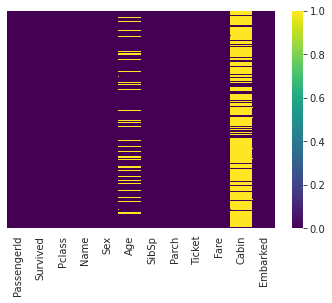

In [118]:
#creating a visulaisation to check which column has maximum null values
sns.heatmap(df1.isnull(),yticklabels= False, cmap= 'viridis')

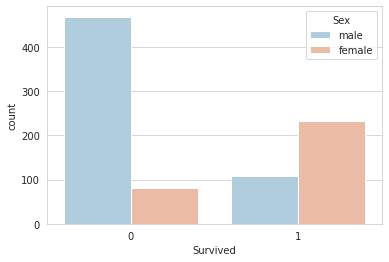

In [119]:
#dsiplaying survived male and female
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue ='Sex', data= df1, palette ='RdBu_r')

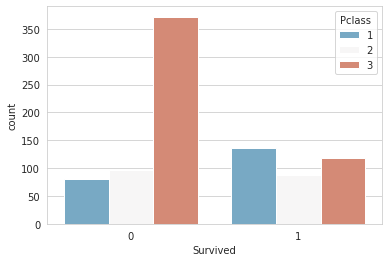

In [120]:
#visualizing passengers that survived according to their Pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue ='Pclass', data= df1, palette ='RdBu_r')

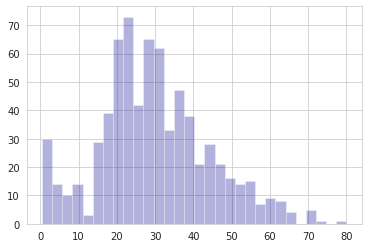

In [121]:
df1['Age'].hist(bins = 30, color = 'darkblue', alpha = 0.3)

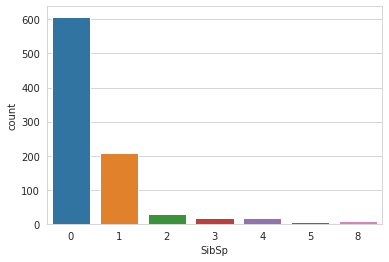

In [122]:
sns.countplot(x = 'SibSp',data = df1)

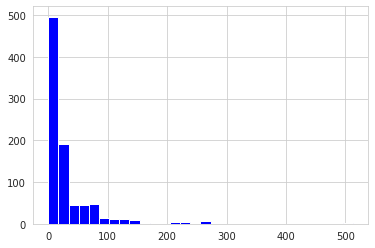

In [123]:
df1['Fare'].hist(color='Blue',bins = 30)

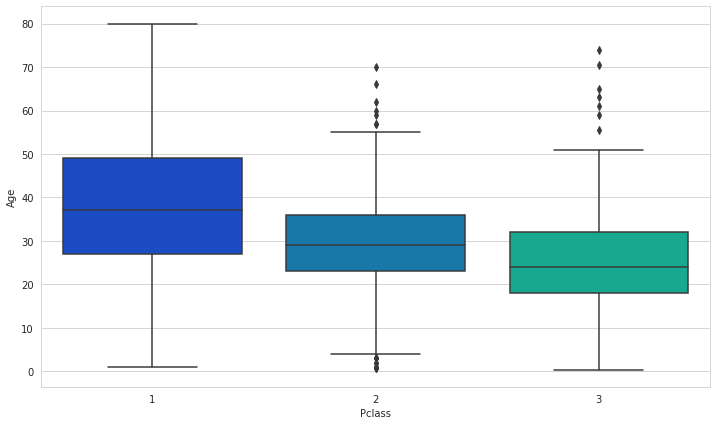

In [124]:
#Removing null values 
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data = df1, palette = 'winter')

In [125]:
#imputing null values 
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass ==1:
      return 37

    elif Pclass ==2:
      return 29
    
    else: 
      return 24

  else:
      return Age


In [126]:
#Applying the function 
df1['Age'] = df1[['Age', 'Pclass']].apply(impute_age)

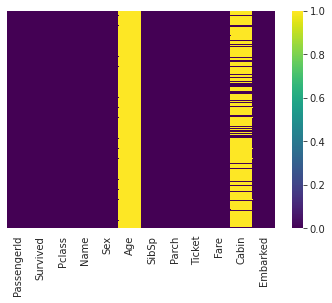

In [127]:
sns.heatmap(df1.isnull(),yticklabels= False, cmap= 'viridis')

In [128]:
#Dropping Cabin as it has many nul values 
df1.drop('Cabin', axis = 1, inplace = True)

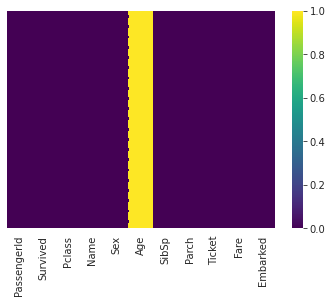

In [129]:
sns.heatmap(df1.isnull(),yticklabels= False, cmap= 'viridis')

In [130]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


In [131]:
#Converting Categorical Features 


In [132]:
pd.get_dummies(df1['Embarked'],drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [133]:
sex = pd.get_dummies(df1['Sex'],drop_first = True)
emabarked = pd.get_dummies(df1['Embarked'], drop_first = True)

In [134]:
df1.drop(['Name','Sex','Embarked','Ticket','Age'] ,axis = 1, inplace = True)

In [135]:
df1 = pd.concat([df1, sex, emabarked],axis = 1)

In [136]:
df1.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,1,0,3,1,0,7.2500,1,0,1
1,2,1,1,1,0,71.2833,0,0,0
2,3,1,3,0,0,7.9250,0,0,1
3,4,1,1,1,0,53.1000,0,0,1
4,5,0,3,0,0,8.0500,1,0,1


In [137]:
#Building a logistic Regression model 


In [138]:
df1.drop(['Survived'],axis = 1)

,PassengerId,Pclass,SibSp,Parch,Fare,male,Q,S
0,1,3,1,0,7.2500,1,0,1
1,2,1,1,0,71.2833,0,0,0
2,3,3,0,0,7.9250,0,0,1
3,4,1,1,0,53.1000,0,0,1
4,5,3,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,887,2,0,0,13.0000,1,0,1
887,888,1,0,0,30.0000,0,0,1
888,889,3,1,2,23.4500,0,0,1
889,890,1,0,0,30.0000,1,0,0


In [139]:
df1['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [140]:
#splitting data as training and testing 
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['Survived'], axis = 1), df1['Survived'], test_size = 0.20, random_state = 30)

In [142]:
#training and prediction 
from sklearn.linear_model import LogisticRegression

In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [146]:
#predicting values 
preict = model.predict(X_test)

In [147]:
#confusion Matrix 
from sklearn.metrics import confusion_matrix 


In [149]:
accuracy = confusion_matrix(y_test, preict)
accuracy

array([[92, 16],
       [25, 46]])

In [151]:
#Obtaining accrucacy for Logistic Model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preict)
accuracy

0.770949720670391